In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#store the contents of .csv file in a dataframe
data = pd.read_csv("C:\\Users\\Akashraj D S\\Downloads\\haberman.csv")

In [4]:
data.shape

(306, 4)

In [5]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

There are no null values in this dataset

<h3> Features in Dataset </h3>

<pre>
Age : Age of the patient
year: Year in which surgery was done
nodes: Number of nodes that patients had
status: survvived after 5 years, died within five years
</pre>

<pre>

<b>Lymph Node</b> 

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

<img src='https://miro.medium.com/max/1400/1*WWnOEUYNCiFh0f3rwjFhsA.jpeg', width=500>


</pre>

In [7]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<pre>
75% of people are having age less than or equal to 60
75% of people having node values less than or equal to 4

In [8]:
data['age'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [9]:
data['year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [10]:
data['nodes'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [11]:
data['status'].unique()

array([1, 2], dtype=int64)

<pre>
Category 1 is <b> Person who lived 5 years or more after surgery </b>
Category 2 is <b> Person who died within 5 years after surgery </b>
</pre>

### To check whether dataset is balanced or not

In [12]:
len(data[data['status']==1])

225

In [13]:
len(data[data['status']==2])

81

<pre>
Dataset is imbalanced. 

It has 226 datapoints for status value 1 

And 81 values for status value 2
</pre>

### View data

In [14]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<h3> Assumptions </h3>

<pre>

node value is inversely proportional to the likelihood of surviving after surgery.
if node values are more, less likely to survive and viceversa


</pre>

### Univariate Analysis

<b> Plotting histograms </b>

Text(0.5, 1, 'Histogram of feature age')

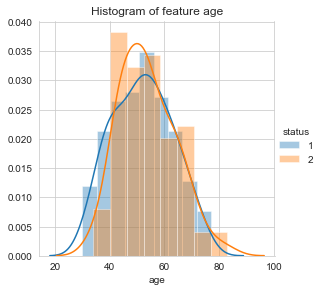

In [15]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'age').add_legend()
plt.title('Histogram of feature age')

In age feature, overlap of data occurs. So, we can't able to come to a conclusion like which age group will survivr within five years and survive more than five years

Text(0.5, 1, 'Histogram of feature year')

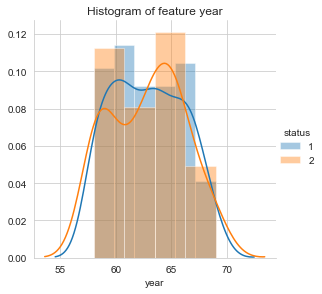

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'year').add_legend()
plt.title('Histogram of feature year')

This feature is also rejected since data overlap occurs most

Text(0.5, 1, 'Histogram of feature nodes')

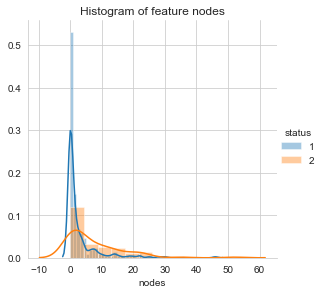

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'nodes').add_legend()
plt.title('Histogram of feature nodes')


Overlap occurs here also, but not the major overapping like 'age' and 'year'

### Find CDF so that we check whether we can get furthermore insights

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


Text(0.5, 1.0, 'PDFs and CDFs of node values of Long survived and short survived people')

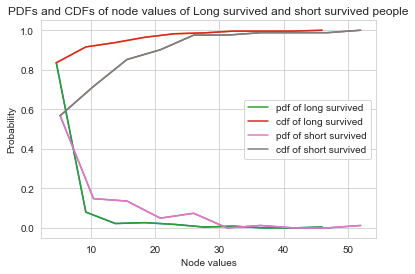

In [18]:
#pdf of long survival
counts, bin_edges = np.histogram(data[data['status']==1]['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
arr1, = plt.plot(bin_edges[1:],pdf)
arr2, = plt.plot(bin_edges[1:],cdf)
#plt.legend([arr1,arr2],['pdf of long survived','cdf of long survived'])
#pdf of short survival
counts, bin_edges = np.histogram(data[data['status']==2]['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
arr3, = plt.plot(bin_edges[1:],pdf)
arr4, = plt.plot(bin_edges[1:],cdf)
plt.xlabel('Node values')
plt.ylabel('Probability')
plt.legend([arr1,arr2,arr3,arr4],['pdf of long survived','cdf of long survived','pdf of short survived','cdf of short survived'])
plt.title('PDFs and CDFs of node values of Long survived and short survived people')



we can say,


<b>if (nodes>0 and nodes<8) 
    <i>long survive </i>
    <b>else:</b>
    <i>short survive</i></b>

<b> Explanation </b>

<pre>

Consider the point where both the pdf intersects, we take the value as 8(approxiately)
If we look at the cdf of those two data, 88% (approx) of long survive patients has node value 8 
and 60% of short survive patients has node value 8.

To choose between two, we'll take it for long survived patients so that node value 8 will be threshold for model

</pre.

<h3> Mean and standard deviation </h3>

In [19]:
print('Mean of the node values of long survive patients')
print(np.mean(data[data['status']==1]['nodes']))
print('Mean of the node values of long survive patients with outliers')
print(np.mean(np.append(data[data['status']==1]['nodes'],34)))
print('Standard deviation of the node values of long survive patients')
print(np.std(data[data['status']==1]['nodes']))
print('\n')
print('Mean of the node values of short survive patients')
print(np.mean(data[data['status']==2]['nodes']))
print('Standard deviation of the node values of short survive patients')
print(np.std(data[data['status']==2]['nodes']))




Mean of the node values of long survive patients
2.7911111111111113
Mean of the node values of long survive patients with outliers
2.9292035398230087
Standard deviation of the node values of long survive patients
5.857258449412131


Mean of the node values of short survive patients
7.45679012345679
Standard deviation of the node values of short survive patients
9.128776076761632


The average node value of long survive patients are close to 3 and short survive patients are close to 8 

### Quantiles and Percentile

In [20]:
print(np.percentile(data[data['status']==1]['nodes'],np.arange(0,100,25)))

print(np.percentile(data[data['status']==2]['nodes'],np.arange(0,100,25)))


print('90th Percentile')

print(np.percentile(data[data['status']==1]['nodes'],90))
print(np.percentile(data[data['status']==2]['nodes'],90))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
90th Percentile
8.0
20.0


<h3> Observations </h3>
<pre>
1. The quantile values, more than 75% of node values in long survive patients are less than or equal to 3
   where more than 75% of people in short survive has node values less than or equal to 11
   
2. The 90th percentile value for long survive is 8, which might be 65th percentile in short survive

3. Majority of node values in long survive is less and in short survive the node values are more,
   hence this proves our assumption <b> if node values are more, patient is more likely to die in next 5 years </b>
   
</pre>

<h3> Box plot </h3>

Text(0.5, 1.0, 'Box plot of feature nodes')

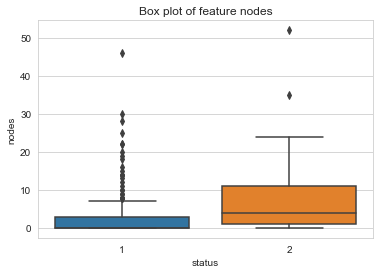

In [21]:
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Box plot of feature nodes')

<h3> Observations </h3>
<pre>
The node values in long survived patients lies in range from 0 to the max value 8(approx)
and in short survived patients, ranges from 0 to 25

And 75% of node value sof long survive patients is typically less than 50% of node value of short survived patients

<h3> Violin Plot </h3>

Text(0.5, 1.0, 'violin plot of feature nodes')

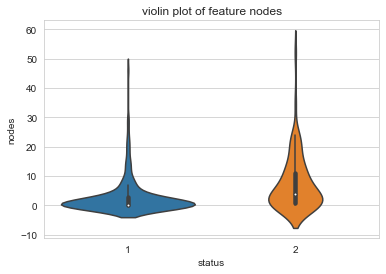

In [22]:
sns.violinplot(x='status',y='nodes',data=data)
plt.title('violin plot of feature nodes')

<pre>The distribution of data from 0 to 10 is high in both the cases</pre>

### Bi-variate analysis

### 2-D scatter plot

Text(0.5, 1, 'Scatter plot of age vs nodes')

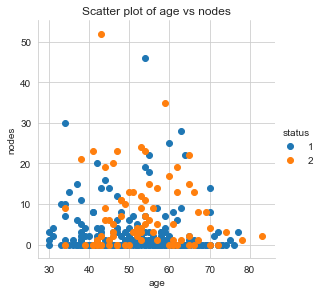

In [23]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='status',height=4).map(plt.scatter,'age','nodes').add_legend()
plt.title('Scatter plot of age vs nodes')

Thought that age will have impact on nodes, but majority of points overlap here and we can't able to distinguish between status=1 and status=2

Hence we go to Pairplots to see which features are good to select

### Pairplots

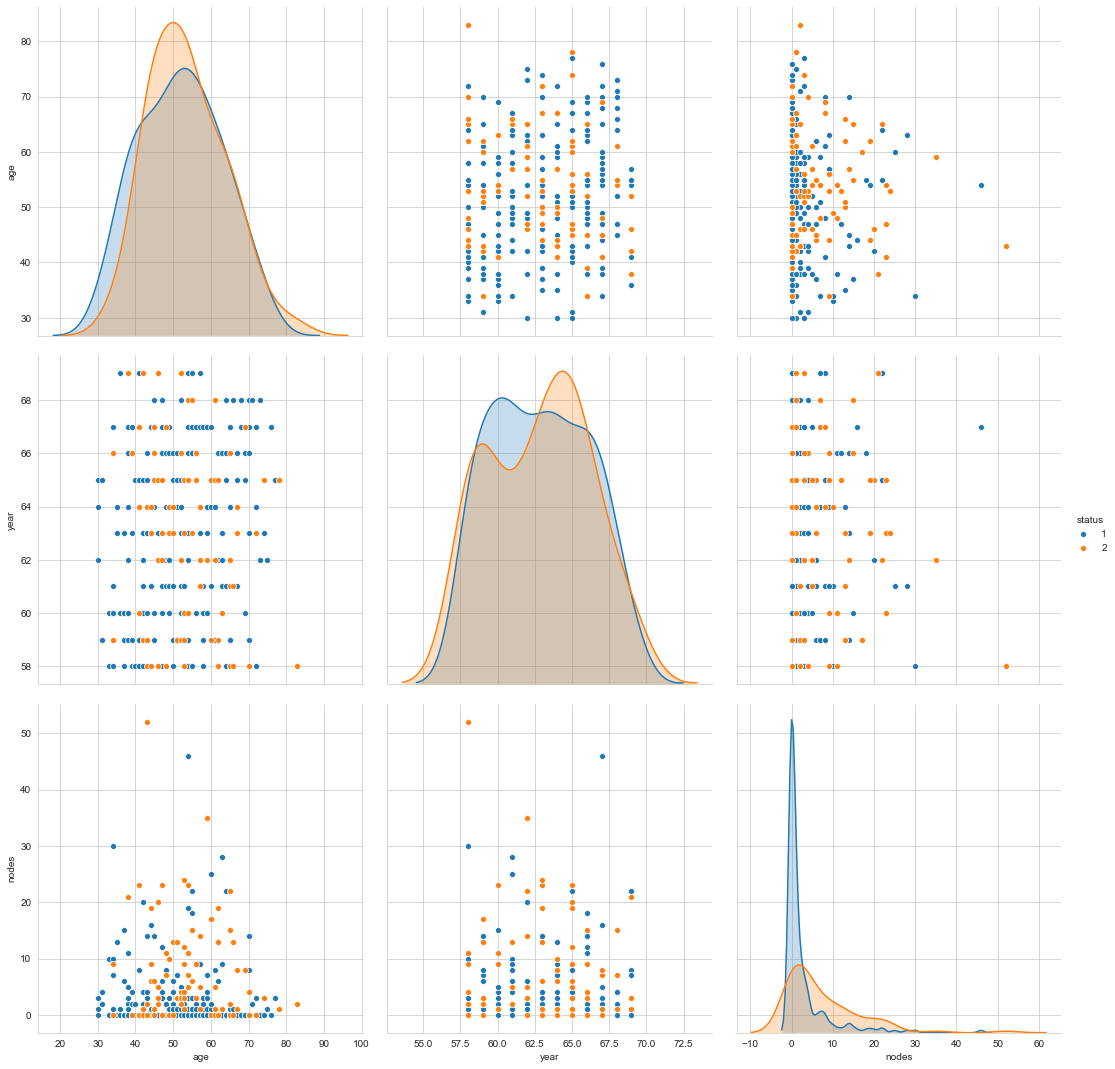

In [24]:
sns.pairplot(data,hue='status',vars=['age','year','nodes'],height=5)

<pre>
Pairplots of age,year and year,nodes are not giving any significant results.
using nodes feature we can get some amount of insights
</pre>

<h3> Multivariate Probability plot,Contour plot </h3>

Text(0.5, 0.98, 'Contour Plot of age vs nodes')

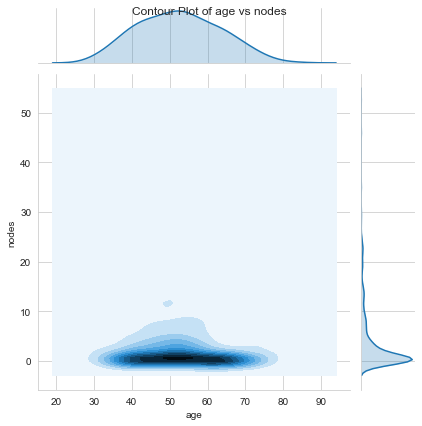

In [26]:
sns.jointplot(x='age',y='nodes',data=data,kind='kde')
#plt.suptitle('Contour Plot of age vs nodes')
plt.suptitle('Contour Plot of age vs nodes')

<pre> More no of age datapoints present between 40-70 and more no of node datapoints present between 0 to 5

### Summary:

<pre>
From the plots taken above, we come to a fact that if nodes are more, then patient less likely to survive after surgery

Distribution of node values in the dataset is more in range of 0 

if node values >=0 and node values <=8 : Patient is more likely to survive

if node values > 8 : Patient is less likely to survive